In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv(r"D:/house-prices-advanced-regression-techniques/train.csv")

In [3]:
#check the decoration
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### First things first: analysing 'SalePrice'

>'SalePrice' was chosen to be analyzed in the beginning because it is one of the important features when someone wants to buy a house. yes house prices, therefore to find out how the role of 'SalePrice' in existing data, we need to dig deeper information about 'SalePrice'.

In [5]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
# shape of dataset
df_train.shape

(1460, 81)

> In this dataset there is 1460 rows and 81 columns where 1 column is a target column which is ['SalePrice']

In [7]:
#check feature/columns in datset
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
# get details of each features/columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

> From above info we can say that dataset is contain int,float,object dtype of columns. Now check null values in dataset

<AxesSubplot:>

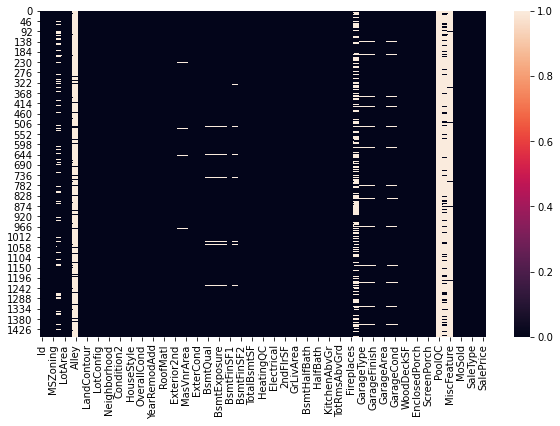

In [9]:
#show null values using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_train.isnull())

>In this plot white line shows how much missing value is in each variable. From this, we can see that PoolQC is the one that is missing the most. We can input this value depending on the data type, if the data type is categorical we can input the missing value from the mode, or if continuous it can be the mean / median of the variable. However, if we look in the dataset documentation, the value of N / A in PoolQC means "No Pool", so the author will fill in the missing value with "None".

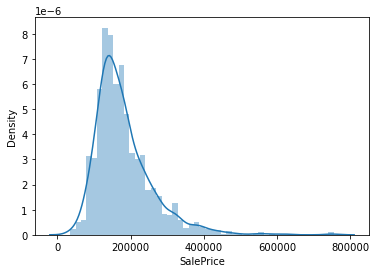

In [10]:
sns.distplot(df_train['SalePrice']);

> The next step is to analyze the column 'SalePrice', because the target variable is numeric then look at the histogram whether distributed normally or not. in the column, in the 'SalePrice' column, we can see a positive skewed because the tail of the distribution is to the right of the most value. That is, most distributions are in low value.  

In [11]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


> Kurtosis is an indicator to show the degree of tilt (tailedness). The greater the kurtosis value, the taper the curve.

### Correlation matrix (heatmap style)

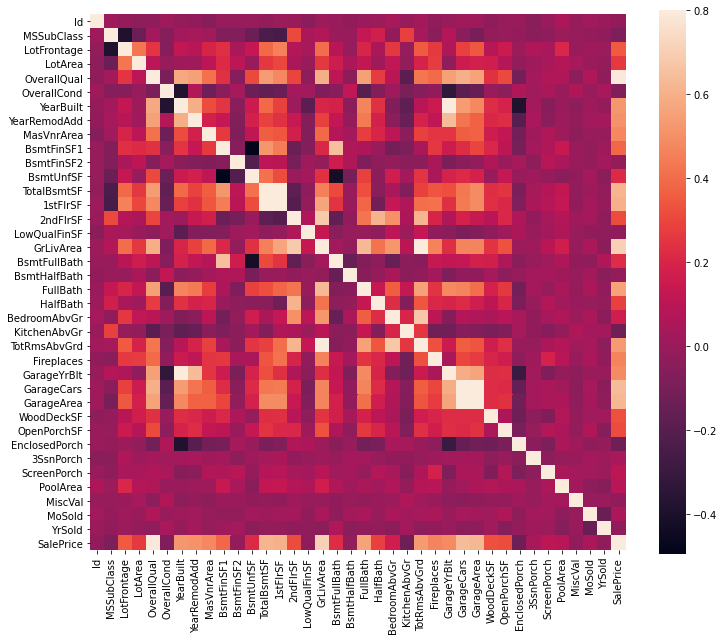

In [12]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, vmax=.8, square=True);

>At first glance, there are two squares of the exact same color that attract attention. The first is the 'TotalBsmtSF' and '1stFlrSF' variables, the second is the 'GarageCars' and 'GarageArea' variables. The two correlations show how significant the correlation between these variables is. This correlation is actually so strong that it can indicate a multicollinearity situation. If we think about these variables, we can conclude that they provide almost the same information so that multicollinearity actually occurs.

>Then for the correlation of 'SalePrice' itself, we can see that it has several strong correlations with the variables 'GrLivArea', 'TotalBsmtSF', and 'OverallQual'. But we can also see many other variables that must be taken into account.

### 'SalePrice' correlation matrix (zoomed heatmap style)

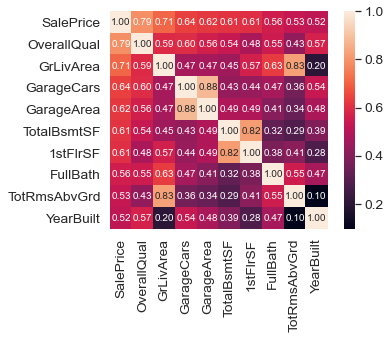

In [13]:
# 'SalePrice' correlation matrix (zoomed heatmap style)

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T) 
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Based on the results above, then this is the conclusion of the variable most correlated with 'SalePrice'. 
1. 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' correlate strongly with 'SalePrice'. This is because these three variables have a value exceeding 0.7.
2. The highlight of this result is that the variable 'OverallQual' has a positive correlation with 'SalePrice'. This makes a lot of sense because the variable 'OverallQual' explains the quality of the finishing of the houses being sold. the better the quality, the higher the price of the house.
3. 'GarageCars' and 'GarageArea' are also the most strongly correlated variables. However, the number of cars entering the garage is a consequence of the area of the existing garage. the two variables 'GarageCars' and 'GarageArea' are two variables that are almost the same and it will be difficult to tell the difference. Therefore, we only need one of these variables in the analysis, which is then the variable chosen for further analysis is the 'GarageCars' variable due to its correlation with 'SalePrice' is higher. 
4. 'TotalBsmtSF' and '1stFloor' also look very similar. We then select the variable 'TotalBsmtSF' for further analysis.
5. 'TotRmsAbvGrd' and 'GrLivArea' are also very similar. 
6. and the last 'YearBuilt' doesn't seem to correlate much with 'SalePrice'. This is a surprising thing, this is because 'YearBuilt' seems to be one of the important points when someone wants to buy a house. how not, 'YearBuilt' can be a reference for how the quality of the house will be purchased. therefore the variable 'YearBuilt' may still be considered for further analysis.


### Scatter plots between 'SalePrice' and correlated variables

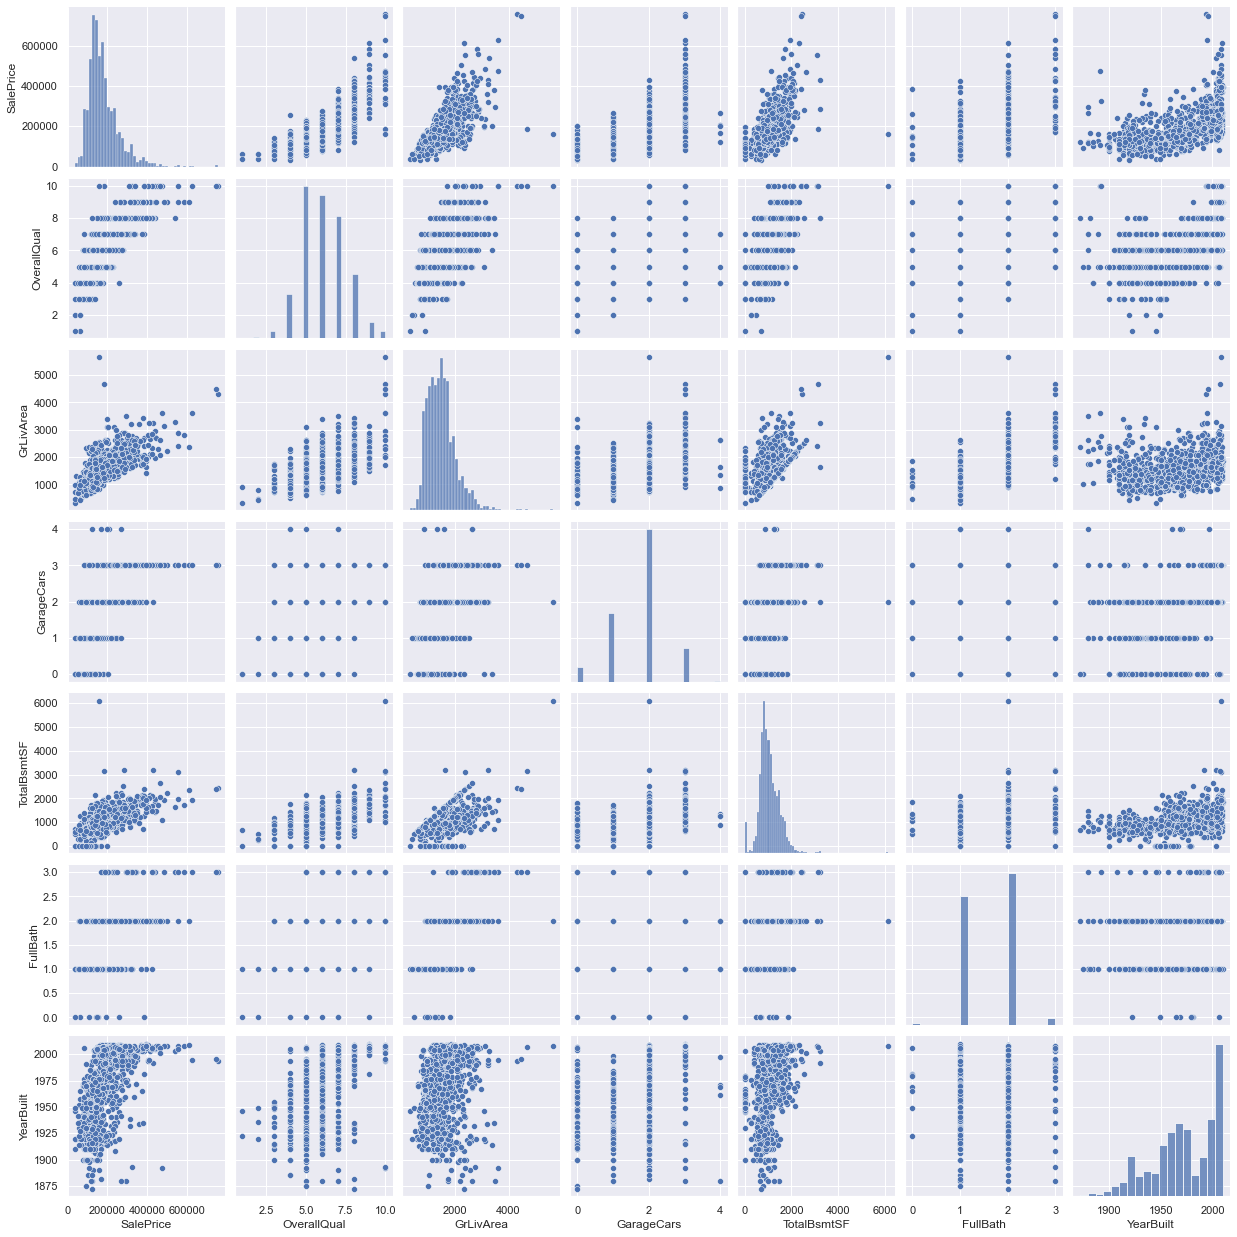

In [14]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], height = 2.5)
plt.show()

> This mega scatter plot gives us a reasonable figures of the variable relationship. Although we already know some of the main variables that affect 'SalePrice'. 

>'GrLiveArea' is one variable which is fairly linear with 'SalePrice'. the greater the value of 'GrLiveArea', the higher the value of 'SalePrice'.

>One of the interesting figures is between 'TotalBsmtSF' and 'GrLiveArea'. In this figures we can see the dots drawing linear lines that almost act like borders.

>The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function. We can also see this same tendency in the upper limit of the 'dots cloud'. Also, notice how the set of dots regarding the last years tend to stay above this limit, which is that prices are increasing faster now.


### Box plot 'SalePrice' over 'YearBuilt'

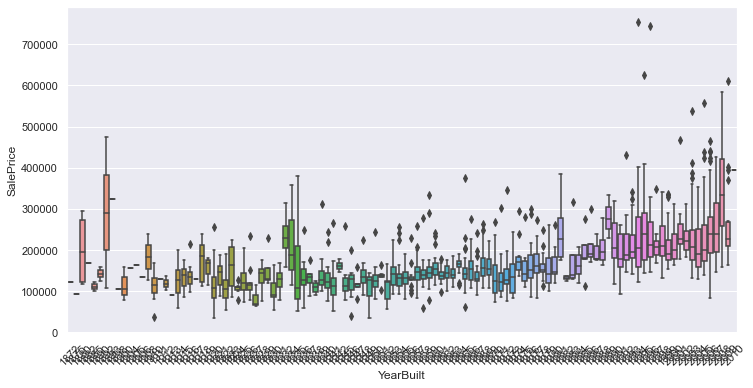

In [15]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'YearBuilt', y = 'SalePrice',  data = df_train)
xt = plt.xticks(rotation=45)

>The box plot analysis above illustrates the distribution of 'SalePrice' data to 'YearBuilt'. We can see that every year there are more and more outlier house prices. The top line is Q3 which means the maximum value, the middle line is the median, and the bottom line is Q1. the box represents the interquartile. However, analysis like this must be careful, because it is possible that the house built has nothing to do with the price of the house so it can be an outlier. This  maybe because there are other factors that affect the price of a house which is very different even though the year of construction is the same.

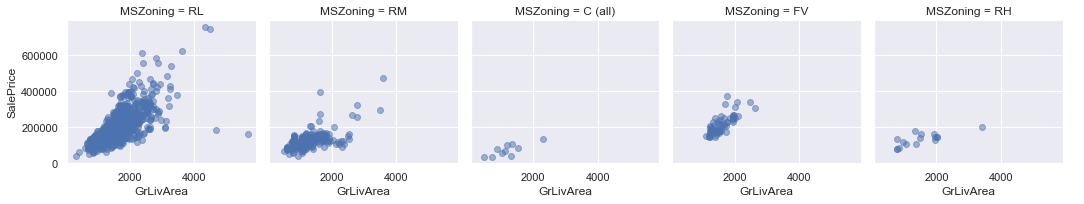

In [16]:
fg = sns.FacetGrid(df_train, col="MSZoning")
fg.map(plt.scatter, "GrLivArea", "SalePrice", alpha=.5)
fg.add_legend();

>FacetGrid above illustrates the distribution of data "GrLivArea" and "SalePrice" in each "MSZoning" or home area. The first box describes the price of houses in Rural Low density area, second is Rural Medium density, third Commerical, fourth Faving, fifth Rural High density. based on the five figures, 'Commercial' houses tend to be cheap, while 'Faving' houses are more expensive. It can be seen that this dataset also further explains this data specifically for predicting houses in Rural Low density areas due to the large amount of data, so that later when we want to build a machine learning model we can focus on segmentation in Rural Low density areas. but if we want to build a model that can cover all the segments above, then the distribution of the existing data must also be balanced first.